<a href="https://colab.research.google.com/github/SHAIKYASIR/Current-Daily-Price-of-Various-Commodities-from-Various-Markets-/blob/main/current_daily_price_of_various_commodities_from_various_markets_t_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/CNN/Current Daily Price of Various Commodities from Various Markets.csv')


In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

#Convert Arrival_Date to datetime
df['Arrival_Date'] = pd.to_datetime(df['Arrival_Date'], format='%d/%m/%Y')

#Encode categorical variables
label_encoders = {}
for column in ['State', 'District', 'Market', 'Commodity', 'Variety', 'Grade']:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Scale numerical features
scaler = StandardScaler()
df[['Min_x0020_Price', 'Max_x0020_Price', 'Modal_x0020_Price']] = scaler.fit_transform(df[['Min_x0020_Price', 'Max_x0020_Price', 'Modal_x0020_Price']])

# Display the first few rows of the preprocessed dataframe
df.head()


,State,District,Market,Commodity,Variety,Grade,Arrival_Date,Min_x0020_Price,Max_x0020_Price,Modal_x0020_Price
0,0,79,520,124,269,0,2024-07-20,-0.533564,-0.609592,-0.593855
1,0,163,344,32,212,0,2024-07-20,0.109669,-0.026282,-0.002101
2,0,163,483,120,176,0,2024-07-20,-0.111454,-0.139011,-0.152088
3,1,52,102,138,156,0,2024-07-20,-0.595525,-0.490191,-0.561791
4,1,122,253,138,156,0,2024-07-20,-0.479348,-0.542867,-0.526165


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Split the data into training and testing sets
X = df.drop(columns=['Modal_x0020_Price', 'Arrival_Date'])
y = df['Modal_x0020_Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")


Mean Squared Error: 0.012731814531947794
R^2 Score: 0.9916740550955072


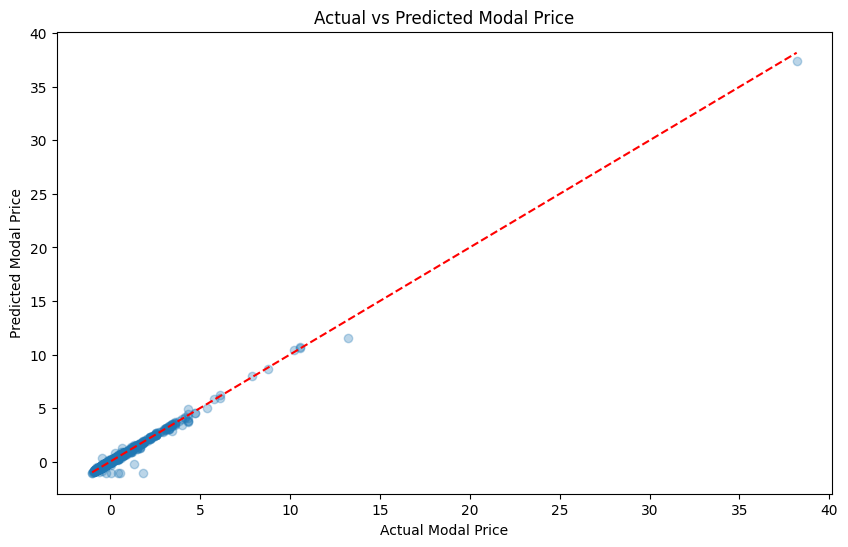

In [ ]:
import matplotlib.pyplot as plt

# Make predictions on the test set
y_pred = model.predict(X_test)

# Compare the predicted values with the actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual Modal Price')
plt.ylabel('Predicted Modal Price')
plt.title('Actual vs Predicted Modal Price')
plt.show()


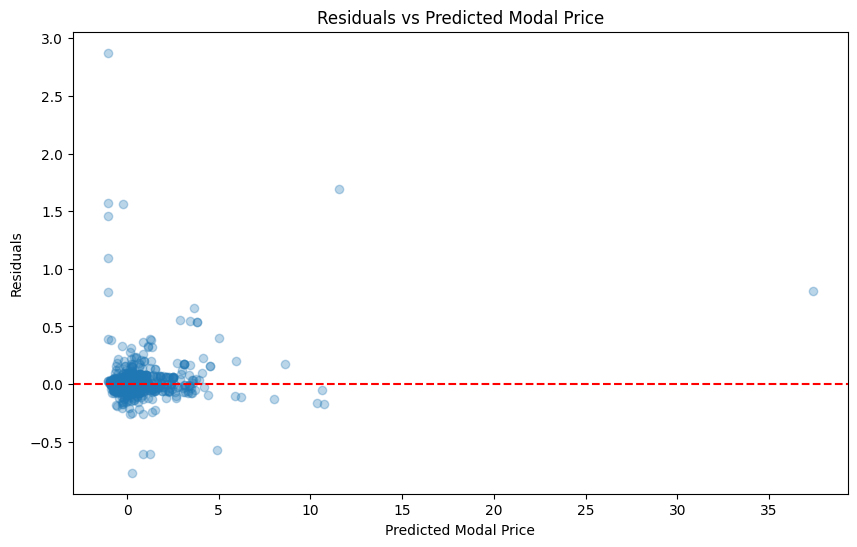

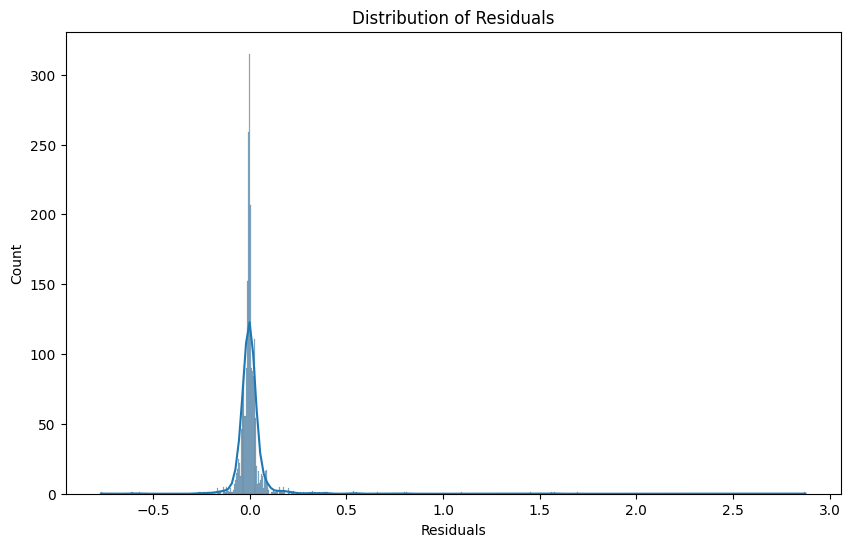

<Figure size 1000x600 with 0 Axes>

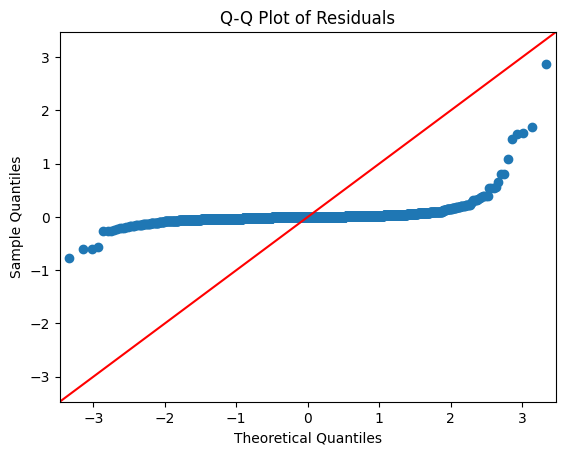

Mean Absolute Error (MAE): 0.03512003645559441
Root Mean Squared Error (RMSE): 0.11283534256582817


In [ ]:
import numpy as np
import seaborn as sns
import statsmodels.api as sm

# Residuals
residuals = y_test - y_pred

# Residual Analysis
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.3)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Modal Price')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Modal Price')
plt.show()

# Distribution of Residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.title('Distribution of Residuals')
plt.show()

# Q-Q Plot
plt.figure(figsize=(10, 6))
sm.qqplot(residuals, line ='45')
plt.title('Q-Q Plot of Residuals')
plt.show()

# Additional Metrics
mae = np.mean(np.abs(residuals))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")


In [ ]:
echo " Current-Daily-Price-of-Various-Commodities-from-Various-Markets-" >> README.md
git init
git add README.md
git commit -m "first commit"
git branch -M main
git remote add origin https://github.com/SHAIKYASIR/Current-Daily-Price-of-Various-Commodities-from-Various-Markets-.git
git push -u origin main


SyntaxError: invalid syntax (<ipython-input-13-6d0902b22f0b>, line 1)